In [81]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [28]:
data={'Country':['B', 'C', 'D', 'E', 'F', 'G', 'H'],
      'Output':[80,150,135,165,95,130,110],
      'Labour':[60,100,100,120,70,90,80],
      'Capital':[50,100,80,100,60,80,70]
}
nation = pd.DataFrame(data,columns=['Country','Output','Labour', 'Capital' ])
nation

,Country,Output,Labour,Capital
0,B,80,60,50
1,C,150,100,100
2,D,135,100,80
3,E,165,120,100
4,F,95,70,60
5,G,130,90,80
6,H,110,80,70


In [144]:
print('The statistics of Output: mean:',nation['Output'].mean(),'\nvariance:',nation['Output'].var(), '\nstandrd deviation:',nation['Output'].std(),'\nmedian values:',nation['Output'].median(),'\n')
print('The statistics of Labour: mean:',nation['Labour'].mean(),'\nvariance:',nation['Labour'].var(), '\nstandrd deviation:',nation['Labour'].std(),'\nmedian values:',nation['Labour'].median(),'\n')
print('The statistics of Capital: mean:',nation['Capital'].mean(),'\nvariance:',nation['Capital'].var(), '\nstandrd deviation:',nation['Capital'].std(),'\nmedian values:',nation['Capital'].median(),'\n')

The statistics of Output: mean: 123.57142857142857 
variance: 914.2857142857143 
standrd deviation: 30.237157840738178 
median values: 130.0 

The statistics of Labour: mean: 88.57142857142857 
variance: 414.2857142857143 
standrd deviation: 20.354009783964297 
median values: 90.0 

The statistics of Capital: mean: 77.14285714285714 
variance: 357.14285714285717 
standrd deviation: 18.89822365046136 
median values: 80.0 



Histogram of Output


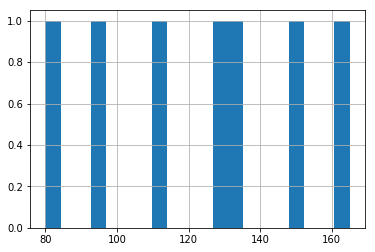

In [156]:
nation['Output'].hist(bins=20)
print("Histogram of Output")

Histogram of Labour


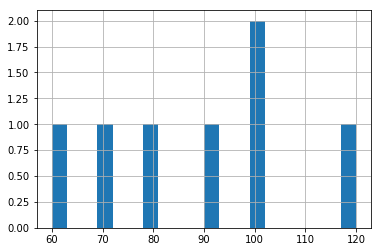

In [157]:
nation['Labour'].hist(bins=20)
print("Histogram of Labour")

In [115]:
Q=nation['Output']
L=nation['Labour']
K=nation['Capital']
nation['logQ']=np.log(Q)
nation['logL']=np.log(L)
nation['logK']=np.log(K)
nation

,Country,Output,Labour,Capital,logQ,logL,logK
0,B,80,60,50,4.382027,4.094345,3.912023
1,C,150,100,100,5.010635,4.605170,4.605170
2,D,135,100,80,4.905275,4.605170,4.382027
3,E,165,120,100,5.105945,4.787492,4.605170
4,F,95,70,60,4.553877,4.248495,4.094345
5,G,130,90,80,4.867534,4.499810,4.382027
6,H,110,80,70,4.700480,4.382027,4.248495


In [107]:
import statsmodels.formula.api as smf

In [129]:
model=smf.ols('logQ~logL+logK',data=nation)
model=model.fit()
model.summary()

D:\software\Anaconda\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   logQ   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     958.4
Date:                Wed, 15 May 2019   Prob (F-statistic):           4.34e-06
Time:                        20:16:45   Log-Likelihood:                 21.712
No. Observations:                   7   AIC:                            -37.42
Df Residuals:                       4   BIC:                            -37.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1462      0.114      1.282      0.269      -0.170       0.463
logL           0.5484      0.090      6.127      0.004       0.300       0.797
logK           0.5087      0.083      6.150      0.004       0.279       0.738
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.801
Prob(Omnibus):                    nan   Jarque-Bera (JB):                2.261
Skew:                           1.352   Prob(JB):                        0.323
Kurtosis:                       3.665   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
Qpre=model.predict()
Qpre

array([4.38189049, 5.01467364, 4.90115138, 5.11466379, 4.55918539,
       4.84336878, 4.71084044])

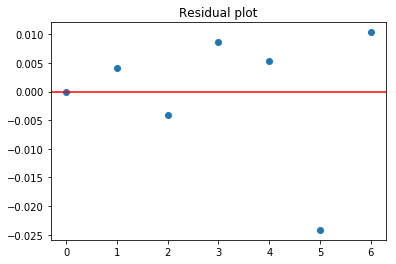

In [158]:
#residual
res=Qpre-nation['logQ']
res
plt.plot(res,'o')
plt.title('Residual plot')
plt.axhline(y=0,color='red')

In [159]:
model.summary()

D:\software\Anaconda\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   logQ   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     958.4
Date:                Wed, 15 May 2019   Prob (F-statistic):           4.34e-06
Time:                        20:53:08   Log-Likelihood:                 21.712
No. Observations:                   7   AIC:                            -37.42
Df Residuals:                       4   BIC:                            -37.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1462      0.114      1.282      0.269      -0.170       0.463
logL           0.5484      0.090      6.127      0.004       0.300       0.797
logK           0.5087      0.083      6.150      0.004       0.279       0.738
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.801
Prob(Omnibus):                    nan   Jarque-Bera (JB):                2.261
Skew:                           1.352   Prob(JB):                        0.323
Kurtosis:                       3.665   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""